In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import chi2_contingency
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.metrics import RocCurveDisplay


In [2]:
data = pd.read_csv('heart-disease.csv')
print(f'The shape of data is {data.shape}')
print(f'The columns namrs is  {data.columns}')

The shape of data is (303, 14)
The columns namrs is  Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [5]:
unique_numbers = []
for i in data.columns:
    x = data[i].value_counts().count()
    unique_numbers.append(x)
    
pd.DataFrame(unique_numbers,index = data.columns,columns=["Total unique_numbers "])
        

,Total unique_numbers
age,41
sex,2
cp,4
trestbps,49
chol,152
fbs,2
restecg,3
thalach,91
exang,2
oldpeak,40


Text(0.5, 1.0, 'Correlation Matrix')

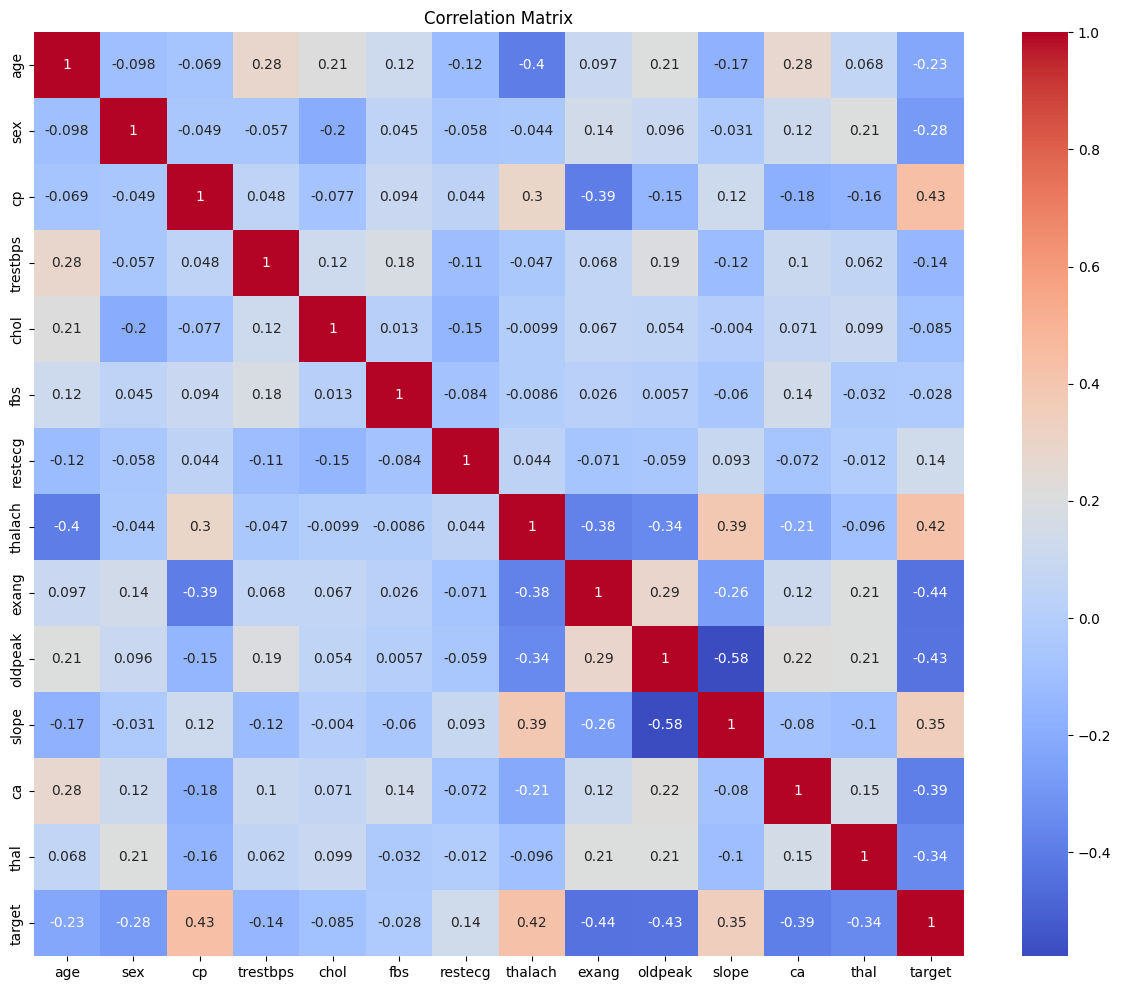

In [6]:
fig , ax = plt.subplots(figsize=(15,12))

sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')


we use Analysis of Variance (ANOVA) to determine the relationship between a categorical dependent variable (target) and several continuous independent variables (age, trestbps, chol, thalach, oldpeak). ANOVA helps us test whether there are significant differences in the means of these continuous variables across the categories of the target variable.

In [7]:

results = []

numeric_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']  

for var in numeric_vars:
    model = smf.ols(f'{var} ~ C(target)', data=data).fit()
    
    anova_table = sm.stats.anova_lm(model, typ=2)
    p_value = anova_table['PR(>F)'][0]
    
    result = {
        'Variable': var,
        'ANOVA p-value': p_value,
        'Significant': p_value < 0.05
    }
    
    if p_value < 0.05:
        tukey = pairwise_tukeyhsd(endog=data[var], groups=data['target'], alpha=0.05)
        tukey_results = tukey.summary().as_text()
        
        result['Tukey\'s HSD'] = tukey_results
    else:
        result['Tukey\'s HSD'] = None
    
    results.append(result)

results_df = pd.DataFrame(results)
results_df


C:\Users\Shiraz1\AppData\Local\Temp\ipykernel_11768\3182827332.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]
C:\Users\Shiraz1\AppData\Local\Temp\ipykernel_11768\3182827332.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]
C:\Users\Shiraz1\AppData\Local\Temp\ipykernel_11768\3182827332.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table

,Variable,ANOVA p-value,Significant,Tukey's HSD
0,age,7.524801e-05,True,"Multiple Comparison of Means - Tukey HSD, FWER..."
1,trestbps,1.154606e-02,True,"Multiple Comparison of Means - Tukey HSD, FWER..."
2,chol,1.387903e-01,False,None
3,thalach,1.697338e-14,True,"Multiple Comparison of Means - Tukey HSD, FWER..."
4,oldpeak,4.085346e-15,True,"Multiple Comparison of Means - Tukey HSD, FWER..."


 In this section, we use the Chi-square test to examine the relationship between independent categorical variables and the target variable, which is also a categorical variable.






In [8]:
categoric_var = ['sex' , 'cp' , 'fbs' , 'restecg' , 'exang' , 'slope' , 'ca' , 'thal' , 'target']

In [9]:

results = []

for var in categoric_var:
    contingency_table = pd.crosstab(data[var], data['target'])
    
    chi2, p, _, _ = chi2_contingency(contingency_table)
    
    results.append({
        'Variable': var,
        'Chi-square value': chi2,
        'P-value': p
    })

results_df_chi = pd.DataFrame(results)
results_df_chi


,Variable,Chi-square value,P-value
0,sex,22.717227,1.876778e-06
1,cp,81.686428,1.334304e-17
2,fbs,0.106273,7.444281e-01
3,restecg,10.023092,6.660599e-03
4,exang,55.944550,7.454409e-14
5,slope,47.506897,4.830682e-11
6,ca,74.366631,2.712470e-15
7,thal,85.303740,2.233351e-18
8,target,298.981398,5.491510e-67


In [10]:
X = data[['thal', 'ca', 'slope', 'exang', 'cp', 'sex', 'oldpeak', 'age', 'thalach']]

y = data['target']

In [11]:
ratios = [0.5, 0.6, 0.7, 0.8, 0.9]
results = []

for ratio in ratios:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-ratio, random_state=42)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    clf = LogisticRegression(max_iter=200).fit(X_train_scaled, y_train)
    
    y_pred = clf.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    results.append((ratio * 100, accuracy * 100))
    print(f"Training Ratio: {ratio*100:.0f}% | Accuracy: {accuracy*100:.2f}%")


Training Ratio: 50% | Accuracy: 82.24%
Training Ratio: 60% | Accuracy: 81.97%
Training Ratio: 70% | Accuracy: 82.42%
Training Ratio: 80% | Accuracy: 86.89%
Training Ratio: 90% | Accuracy: 83.87%


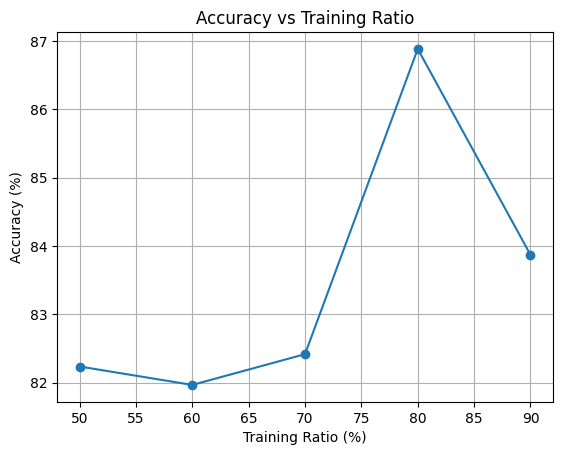

In [12]:

training_ratios, accuracies = zip(*results)
plt.plot(training_ratios, accuracies, marker='o', linestyle='-')
plt.title('Accuracy vs Training Ratio')
plt.xlabel('Training Ratio (%)')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.show()


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = LogisticRegression(max_iter=200).fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)


In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Model Performance Metrics:")

print(f"Accuracy: {accuracy:.4f}")

print(f"Precision: {precision:.4f}")

print(f"Recall: {recall:.4f}")

print(f"F1-Score: {f1:.4f}")

Model Performance Metrics:
Accuracy: 0.8689
Precision: 0.8750
Recall: 0.8750
F1-Score: 0.8750


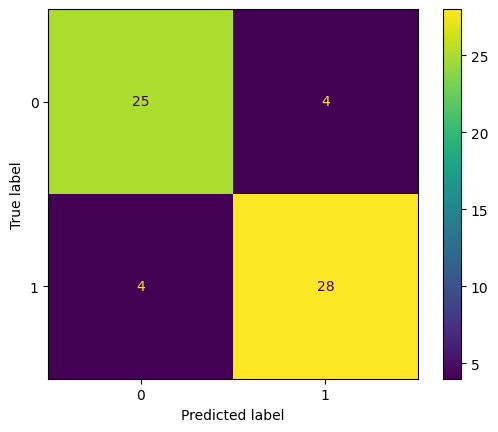

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

disp.plot()

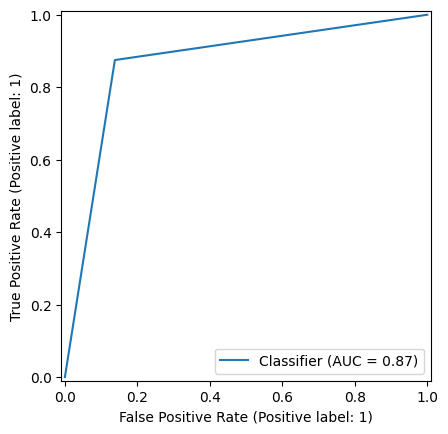

In [24]:
ROC = RocCurveDisplay.from_predictions(y_test, y_pred)
plt.savefig('roc_curve.png')
